<a href="https://colab.research.google.com/github/CarolinaPiedrahita/fundamentos_IA/blob/main/Trabajo_final_ML_Cancer_Dataset_Esp_IA_grupo8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Machine Learning NRC–407
**Taller 4**



**Grupo 8**

Angela Sofia Moreno Rodriguez

Carolina Piedrahita

Alvaro Miguel Villadiego Velasquez



Félix Julian Gutierrez Bernal


### **Mediante este trabajo se pretende elaborar de forma colaborativa un proyecto de machine learning sobre una data, con el objetivo de evaluar el rendimiento del modelo a partir de las métricas del algoritmo. A través de los siguientes pasos:**



1. Seleccionar un problema: Clasificación.
2. Elegir  datasets.
3. Considerar al menos tres modelos disponibles:

- Regresión logística
- Árboles de decisiones
- KNN
- SVM
- RandomForest

4. Definir estrategias para obtener el mejor modelo posible para el tipo de problema a resolver (el mejor modelo de regresión logística, el mejor de red neuronal, etc).
5. Definir estrategias para comparar modelos.
6. Indicar como se abordó el problema propuesto.
  - Caracteristicas de la solución propuesta
  - Caso de uso.

## **DESCRIPCIÓN DEL DATASET CANCER**


**Con este dataset se pretende** realizar una revisión de diferentes modelos para finalmente realizar la implementación del más ajustado para diagnosticar el posible padecimiento de cáncer de mama teniendo como base los hitoricos clinicos de este dataset de pacientes con afecciones malignans o benignas.

**Resumen :** Base de datos de diagnóstico de cáncer de mama de Wisconsin.

**- Características del conjunto de datos:**  Multivariante

**- Número de instancias:** 569

**- Número de atributos:** 32

**- Tipo de problema:** Clasificación


**Variables de clasificación:**

1) ID number (Número de identificación)

2) Diagnosis (M = malignant, B = benign) - Diagnostico (M=Maligno, B=Benigno)

**Descripción de las demás variables del dataset:**

a) radius (radio: es la media de las distancias desde el centro a los puntos en el perímetro)

b) texture (Textura: Es la deviación estándar de los valores de al escala de grises)

c) perimeter (es el perímetro)

d) area (es el área)

e) smoothness (Suavidad: es la variación local en las longitudes de los radios)

f) compactness (compacidad: perimeter^2 / area - 1.0)

g) concavity (concavidad: severidad de las porciones cóncavas del contorno)

h) concave points (puntor cóncavos: Número de porciones cóncavas del contorno)

i) symmetry (Simetría)

j) fractal dimension (dimesión fractal: "coastline approximation" - 1 (("aproximación de la línea de costa" - 1))







Para más información del dataset:
https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+(Diagnostic)

# **Como se va abordar el problema propuesto.**

Se va a realizar un analisis y caracterización de datos de pacientes que padecen de cáncer de mama.  Para luego implementar modelos que según la literatura estan enfocado en el diagnostico del cáncer de mama. Luego se va realizar una predicción implementando cada uno de estos modelos. Como resultado final se tendrá una comparación de la efectividad de cada uno de estos y la selección del más preciso de ellos para un ejemplo de caso de uso con varios pacientes.

# **1.CARGAR BASE DE DATOS DESDE EL REPOSITORIO E IMPORTAR LIBRERIAS**



### Importación e instalación de librerías

In [1]:
!pip install hypertools

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.7/59.7 kB 622.8 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.7/85.7 kB 1.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.9/56.9 kB 5.4 MB/s eta 0:00:00


In [2]:
# importar libreria para la manipulación de datos
import numpy as np
import pandas as pd
#importar libreria para la visualización de datos
import matplotlib.pyplot as plt
from matplotlib import pyplot

%matplotlib inline
import warnings
pd.set_option('display.max_columns', 100)

#importar librería para la visualización de datos estadísticos
import seaborn as sns; sns.set(style="ticks", color_codes=True)
import string
import cv2
import glob
import os
import hypertools as hyp
from mlxtend.plotting import plot_decision_regions

# importar librería para el pre-procesamiento de los datos
import sklearn.preprocessing
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split # to split the data into two parts
from sklearn.model_selection import GridSearchCV# for tuning parameter

#importar librería para la separación de los datos de entrenamiento
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import validation_curve, learning_curve
from sklearn.metrics import f1_score, accuracy_score
from sklearn.model_selection import KFold

#importar librería para modelar
from sklearn.linear_model import LogisticRegression # algoritmo de clasificación.
from sklearn.tree import DecisionTreeClassifier # algoritmo de decission trees.
from sklearn.svm import SVC # algoritmo de clasificación maquina de vectores
from sklearn import svm # for Support Vector Machine
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import NearestCentroid # algoritmo de knn.
from sklearn.ensemble import RandomForestClassifier # algoritmo ramdonforest
from sklearn.ensemble import ExtraTreesClassifier # otro algoritmo de random forest

from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.utils.multiclass import unique_labels
from sklearn import datasets, metrics
from sklearn.pipeline import Pipeline

from sklearn.metrics import confusion_matrix  # para generar la matriz de confusion de los modelos con mejores resultados
from sklearn.metrics import roc_curve, auc  # para generar la curva roc de los modelos con mejores resultados

### Leer el dataset

In [3]:
##
## Leer el archivo cancer.data
#Cargamos el dataset

df = pd.read_csv(
    "https://raw.githubusercontent.com/stabordag/dataset/main/cancer.csv",
    sep = ',',         # separador de campos
    thousands = None,  # separador de miles para números
    decimal = '.')     # separador de los decimales para números

df.head()



,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [4]:
df = df.dropna(how='all', axis=1)

# **2. ANÁLISIS EXPLORATORIO DE DATOS**

### 2.1. Análisis preliminar

In [5]:
# Observamos sus tipos de datos
df.dtypes

# Se observa que el campo id sobraría
# Y el campo 'Unnamed:32' se debe retirar del dataset ya que no aporta nada.

id                           int64
diagnosis                   object
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst     

In [11]:
df.head()
#Se observa que 'diagnosis' es la variable predictora donde: M=Maligno B=Begnino
#Para terminos practicos de modelado debemos convertir la variable diagnosis a número.

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [12]:
# Agrupar los valores de la columna indicada y sumarlos
# los valores "B" y "M" corresponderan a  0 y 1 respectivamente más adelante
df[ 'diagnosis' ].value_counts()
# Se observa efectivamente que tenemos un dataset desbalanceado
# con 357 casos Begninos y 212 casos Malignos

diagnosis
B    357
M    212
Name: count, dtype: int64

Text(0.5, 1.0, 'Cantidad de personas por diagnostico 0=(B)Begninos 1=(M)Malignos')

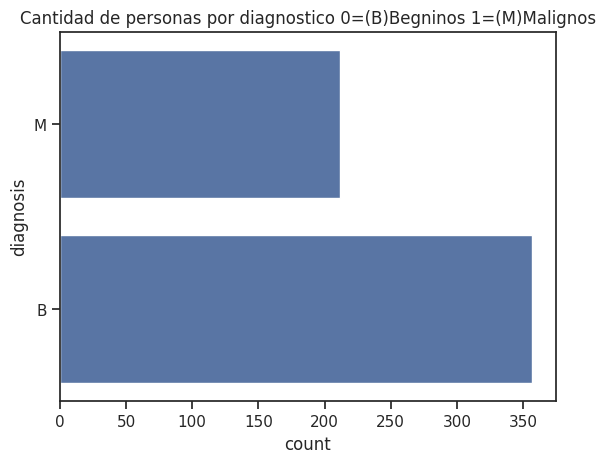

In [8]:
#Visualización de la columna "diagnosis"
## comparación estadística casos Benignos (0) vs Malingnos(1)
sns_plot = sns.countplot(df['diagnosis'],label="Count")
plt.title("Cantidad de personas por diagnostico 0=(B)Begninos 1=(M)Malignos")

In [14]:
df.tail()

# Se observa que los valores de cada columna se encuentran en rangos muy diferentes.
# Por buenas practicas se deben normalizar dichos valores para que al entrenar nuestros modelos clasificadores no cobren algunos más peso que otros.


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,1.1760,1.256,7.673,158.70,0.010300,0.02891,0.05198,0.02454,0.01114,0.004239,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,0.7655,2.463,5.203,99.04,0.005769,0.02423,0.03950,0.01678,0.01898,0.002498,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,0.4564,1.075,3.425,48.55,0.005903,0.03731,0.04730,0.01557,0.01318,0.003892,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,0.7260,1.595,5.772,86.22,0.006522,0.06158,0.07117,0.01664,0.02324,0.006185,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400
568,92751,B,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,0.1587,0.05884,0.3857,1.428,2.548,19.15,0.007189,0.00466,0.00000,0.00000,0.02676,0.002783,9.456,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.0000,0.2871,0.07039


In [15]:
# Hacemos un describe que nos muestre información sobre las columnas
df.describe()

# A través de esta decripción podemos identificar columnas que quizá tiene valores anómalos...veamos

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,0.405172,1.216853,2.866059,40.337079,0.007041,0.025478,0.031894,0.011796,0.020542,0.003795,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,0.277313,0.551648,2.021855,45.491006,0.003003,0.017908,0.030186,0.006170,0.008266,0.002646,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,0.111500,0.360200,0.757000,6.802000,0.001713,0.002252,0.000000,0.000000,0.007882,0.000895,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,0.232400,0.833900,1.606000,17.850000,0.005169,0.013080,0.015090,0.007638,0.015160,0.002248,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,0.324200,1.108000,2.287000,24.530000,0.006380,0.020450,0.025890,0.010930,0.018730,0.003187,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,0.478900,1.474000,3.357000,45.190000,0.008146,0.032450,0.042050,0.014710,0.023480,0.004558,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,2.873000,4.885000,21.980000,542.200000,0.031130,0.135400,0.396000,0.052790,0.078950,0.029840,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


### 2.2. Eliminación de columnas inservibles

In [16]:
df.dropna(how='all', axis=1)#Eliminación de columnas nulas

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,1.1760,1.2560,7.673,158.70,0.010300,0.02891,0.05198,0.02454,0.01114,0.004239,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,0.7655,2.4630,5.203,99.04,0.005769,0.02423,0.03950,0.01678,0.01898,0.002498,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,0.4564,1.0750,3.425,48.55,0.005903,0.03731,0.04730,0.01557,0.01318,0.003892,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,0.7260,1.5950,5.772,86.22,0.006522,0.06158,0.07117,0.01664,0.02324,0.006185,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [17]:
#df = df.drop(['Unnamed: 32'], axis=1)
df = df.drop(['id'], axis=1)


### 2.3. Detección y tratamiento de valores nulos y fuera de rango o atípicos

In [18]:

df.isnull().values.any()
# Obtenemos: False
# Esto nos indica que en el dataframe no hay valores nulos,
# por lo que esta parte del análisis y trastamiento no aplica en este caso

False

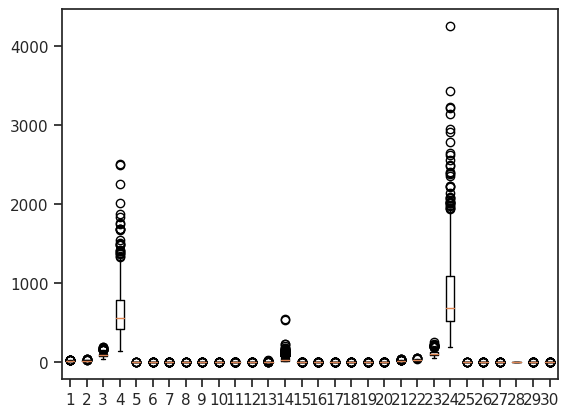

In [19]:
# Para ver mejor la distribución de valores, dibujamos unos diagramas de bigotes, prescindiendo de la columna 'diagnosis'

plt.boxplot(df.iloc[:, 1:].values)
plt.show()

# En el gráfico puede observarse que casi todas las columnas tienen una distribución correcta.
# A continuación vamos a analizar en detalle aquellas que presentan la posibilidad de outliers y decidir al respecto

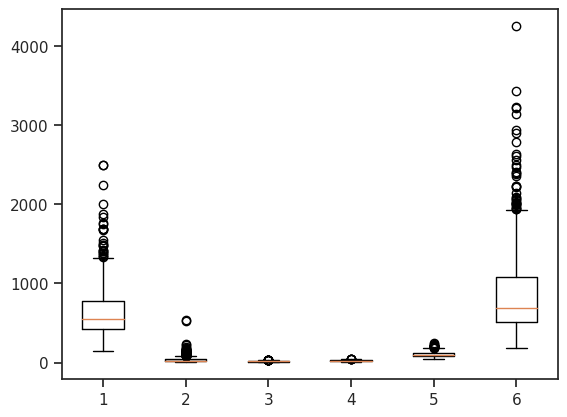

In [20]:
plt.boxplot(df.iloc[:, [4, 14, 21, 22, 23, 24]].values)
plt.show()

# Se puede observar que en estas columnas hay valores que se quedan fuera del rango intercuartílico, por lo que a priori son
# valores atípicos que deben estudiarse detenidamente.

# Vamos a ello en las celdas siguientes

# Las columnas en las que analizar outliers son:
#   4. area_mean
#  14. area_se
#  21. radius_worst
#  22. texture_worst
#  23. perimeter_worst
#  24. area_worst

In [21]:
df_outl_area_mean = df[df['area_mean'] > 782]
print (df_outl_area_mean['area_mean'])
print ('Total: ',df.shape)
print ('% filas outlier: ', len(df_outl_area_mean)/len(df))

# Podríamos tomar muchas decisiones respecto a todos estos datos, pero por un lado, en este caso, en este dataset,
# se trata de medias, distancias, etc....datos que en caso de modificarlos podría ser que estuviésemos cambiando datos correctos
# y si eliminamos 144 filas de un total de 569 estamos eliminando la cuarta parte del dataset.... lo que significa que en 4 drop
# hemos eliminado el dataset completo y ya no hay nada que analizar ni modelo que entrenar.

# Conclusión, en este caso, vamos a suponer la veracidad de los datos y asumir éstos valores atípicos como atípicos pero reales.

0      1001.0
1      1326.0
2      1203.0
4      1297.0
6      1040.0
        ...  
563    1347.0
564    1479.0
565    1261.0
566     858.1
567    1265.0
Name: area_mean, Length: 144, dtype: float64
Total:  (569, 31)
% filas outlier:  0.2530755711775044


### 2.4. Tratamiento de la vairable objetivo: diagnosis (diagnostico). Conversión a entero y renombrado de columna

Para poder entrenar los modelos es necesarios convertir los datos tipo string como el diagnostico M ó B deben ser convertidos a valores enteros, para que el entrenamiento de los modelos sea mas eficiente, es decir la columna diagnosis pasará de tener las letras M y B a 1 y 0 respectivamente

In [22]:
df = pd.get_dummies(df, columns = ["diagnosis"], drop_first = True)
df.rename(columns={'diagnosis_M': 'diagnosis'}, inplace=True)

df.head(21)

#Maligno se va identificar con el número 1
#Begnino se va identificas con el número 0

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,diagnosis
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.049040,0.05373,0.015870,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.26540,0.4601,0.11890,True
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.013080,0.01860,0.013400,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.18600,0.2750,0.08902,True
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.040060,0.03832,0.020580,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.24300,0.3613,0.08758,True
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.074580,0.05661,0.018670,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.25750,0.6638,0.17300,True
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.024610,0.05688,0.018850,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.16250,0.2364,0.07678,True
5,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,0.2087,0.07613,0.3345,0.8902,2.217,27.19,0.007510,0.033450,0.03672,0.011370,0.02165,0.005082,15.47,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.17410,0.3985,0.12440,True
6,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,0.1794,0.05742,0.4467,0.7732,3.180,53.91,0.004314,0.013820,0.02254,0.010390,0.01369,0.002179,22.88,27.66,153.20,1606.0,0.1442,0.2576,0.3784,0.19320,0.3063,0.08368,True
7,13.71,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,0.2196,0.07451,0.5835,1.3770,3.856,50.96,0.008805,0.030290,0.02488,0.014480,0.01486,0.005412,17.06,28.14,110.60,897.0,0.1654,0.3682,0.2678,0.15560,0.3196,0.11510,True
8,13.00,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,0.2350,0.07389,0.3063,1.0020,2.406,24.32,0.005731,0.035020,0.03553,0.012260,0.02143,0.003749,15.49,30.73,106.20,739.3,0.1703,0.5401,0.5390,0.20600,0.4378,0.10720,True
9,12.46,24.04,83.97,475.9,0.11860,0.23960,0.22730,0.08543,0.2030,0.08243,0.2976,1.5990,2.039,23.94,0.007149,0.072170,0.07743,0.014320,0.01789,0.010080,15.09,40.68,97.65,711.4,0.1853,1.0580,1.1050,0.22100,0.4366,0.20750,True


### 2.5. Relación porcentual que existe entre cada variable

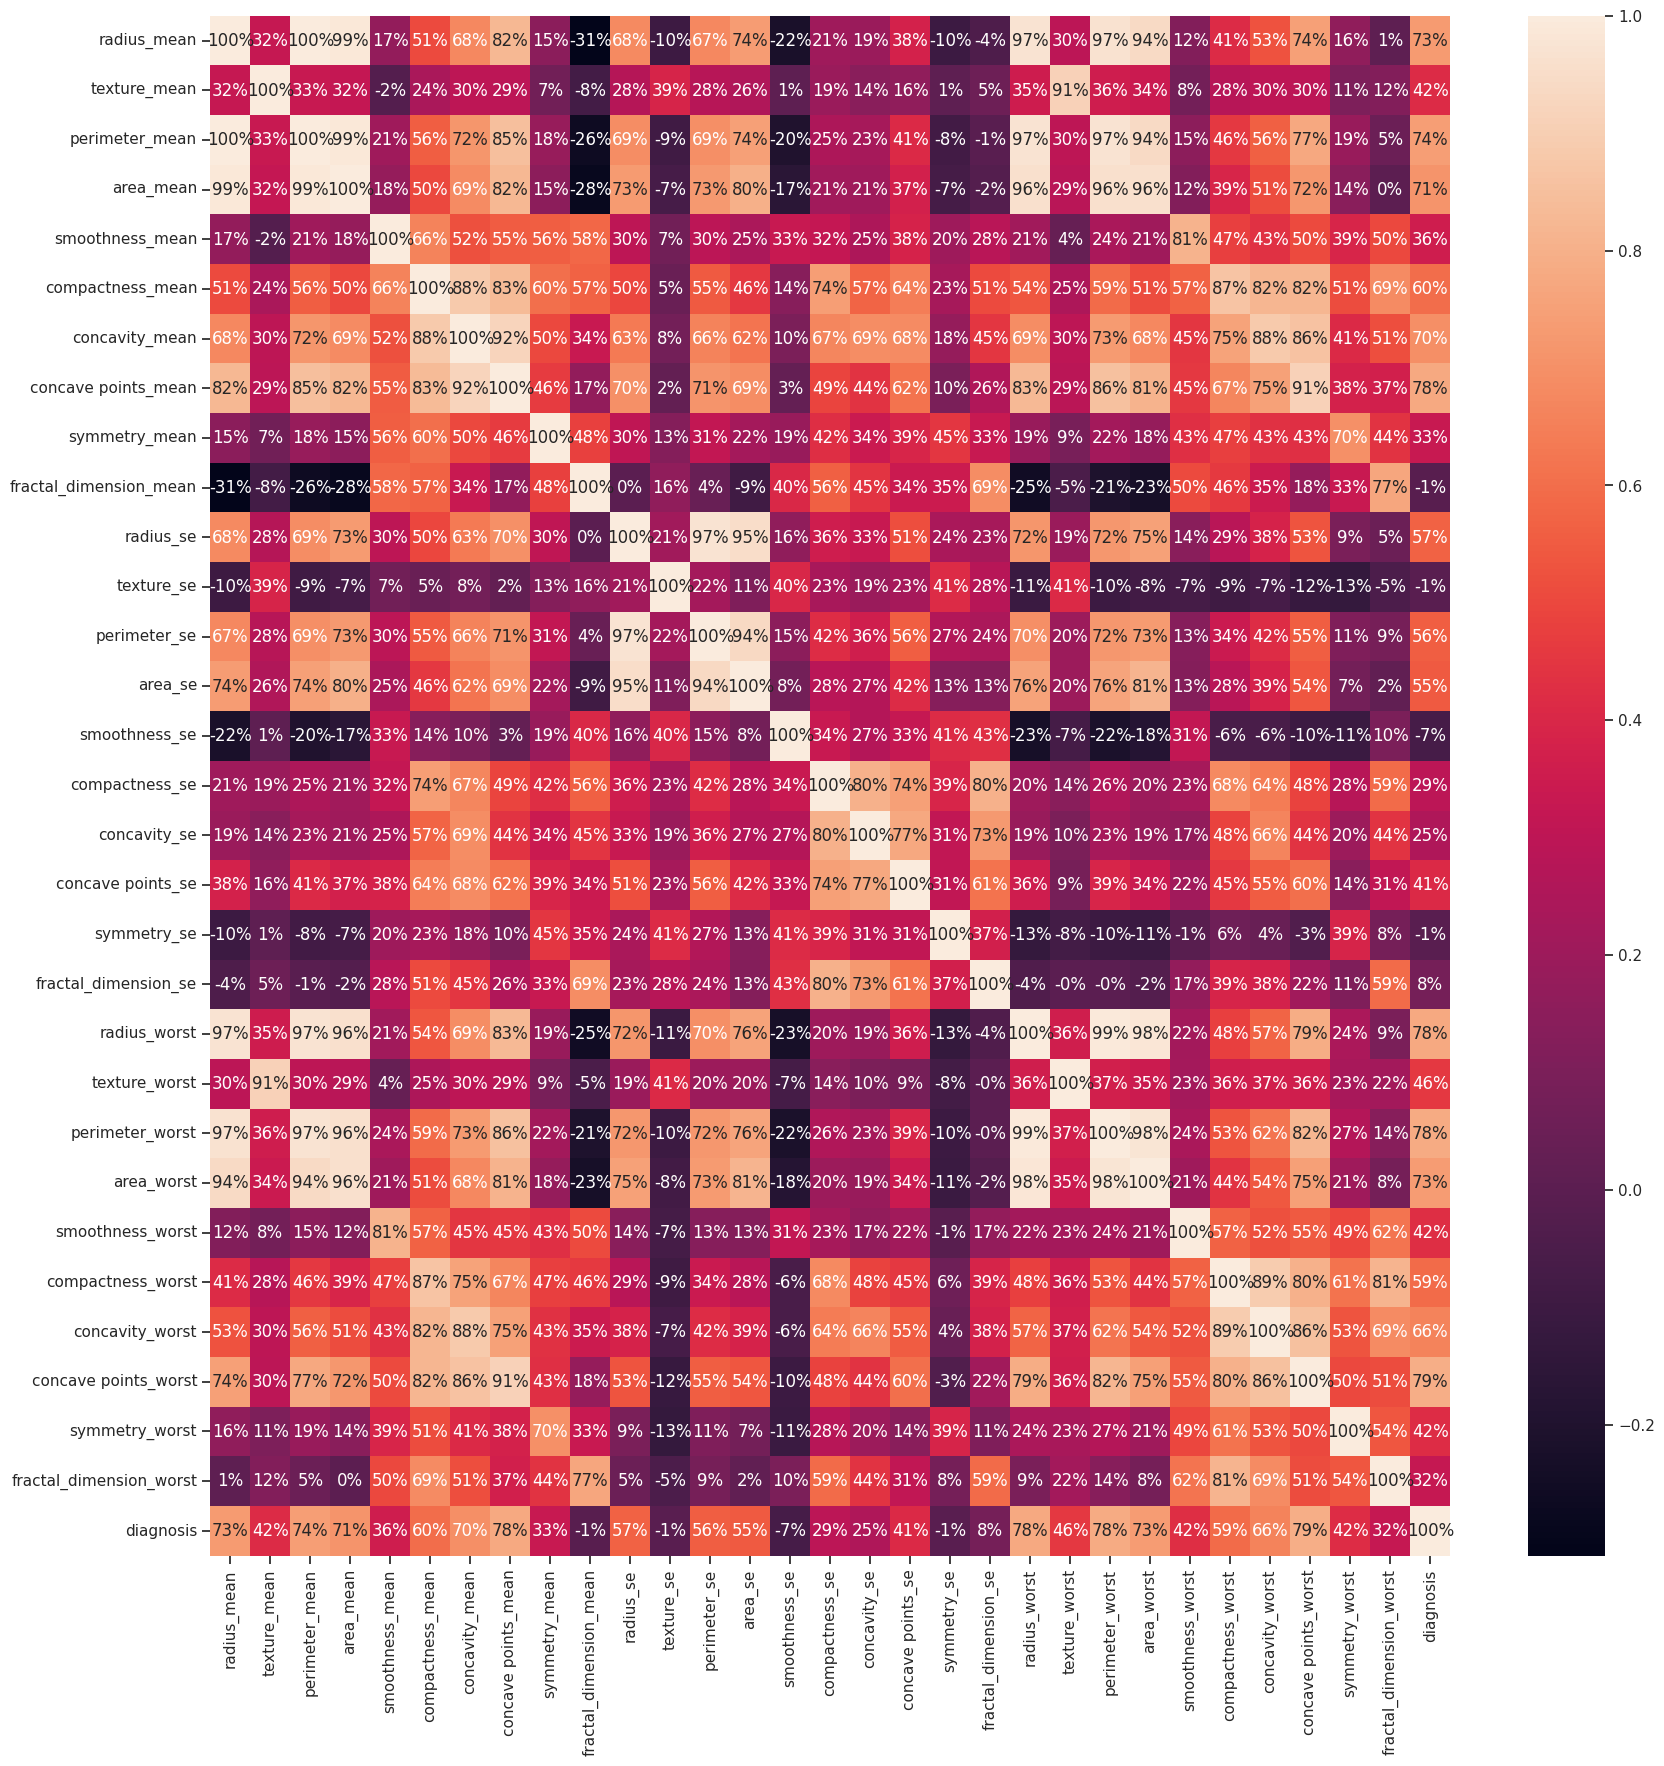

In [23]:
#Generamos un grafico de calor.
plt.figure(figsize=(20,20))
sns_plot= sns.heatmap(df.corr(), annot=True, fmt='.0%')

Se observa que **el atributo más influyente en que el diagnostico sea maligno es de concave_points_worst** que cuenta con un 79% de ocurrencias respecto al atributo diagnostico.

- concave_points_worst 79%

También podemos observar que los atributos que mayor importancia tienen en el dataset son:

- radius_worst con 78%
- Concave_points_mean 78%
- perimeter_worst 78%
- perimeter_mean con 74%,
- radius_mean con 73%,
- area_mean con 71%,
- concavity_mean con 70%



El Sistema de enfoque de vision por computadora a través del cual se recolectaron los datos del dataset extrae diez caracteristicas diferentes
de los limites del nucleo celular generado en las snakes (las cuales son definidas como contornos basados en la representación final de
los limites del nucleo celular). Todas las caracteristicas se modelan numericamente de modo que **los valores mas grandes generalmente indican una mayor probabilidad de malignidad.** Visualicemos el comportamiento de los datos según el diagnostico para las caracteristicas geometricas:






a) radius (radio: es la media de las distancias desde el centro a los puntos en el perímetro)

b) texture (Textura: Es la deviación estándar de los valores de al escala de grises)

c) perimeter (es el perímetro)

d) area (es el área)

e) smoothness (Suavidad: es la variación local en las longitudes de los radios)

f) compactness (compacidad: perimeter^2 / area - 1.0)

g) concavity (concavidad: severidad de las porciones cóncavas del contorno)

h) concave points (puntor cóncavos: Número de porciones cóncavas del contorno)

i) symmetry (Simetría)

j) fractal dimension (dimesión fractal: "coastline approximation" - 1 (("aproximación de la línea de costa" - 1))





# **3. GENERACIÓN DE MODELOS CLASIFICADORES**

Se pretende realizar un analisis comparativo de la precisión de los siguientes modelos (Regresión logistica, Arbol de desciones, Randomforest, KNN; SVM) con el fin de evidenciar cual es mejor a la hora de hacer un diagnostico de cáncer de mama.

### Preparación de datos para entrenar modelo

In [25]:
X = df.iloc[: , :-1].values
y = df.iloc[:, -1:].values

Puede verse que las clases no están balanceadas, a pesar de ello, no parece haber demasiado sesgo

### Separamos un 20% de los datos para test posterior y escalamos todos los datos para equilibralos

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [27]:
sc = StandardScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

## **3.1. Entrenamiento con REGRESIÓN LOGISTICA**

In [28]:
DiccionarioError={}
model = LogisticRegression(penalty='l2', C=1E10, class_weight="balanced")
model.fit(X_train, y_train.ravel())

kf = KFold(n_splits=5, shuffle=True, random_state=123)

scores = cross_val_score(model, X_train, y_train.ravel(), cv=kf, scoring="accuracy")

print("Metricas cross_validation Regresión Logistica", scores)

print("Media de cross_validation Regresión Logistica", scores.mean())

preds_RL = model.predict(X_test)

score_pred = metrics.accuracy_score(y_test.ravel(), preds_RL)

print("Metrica en Test Regresión Logistica", score_pred)

DiccionarioError["RL"]=scores.mean()
DiccionarioError

Metricas cross_validation Regresión Logistica [0.91208791 0.94505495 0.97802198 0.96703297 0.95604396]
Media de cross_validation Regresión Logistica 0.9516483516483516
Metrica en Test Regresión Logistica 0.9385964912280702


{'RL': 0.9516483516483516}

Se observa que se tiene una  **precisión del 0.93**  para el aprendizaje del modelo de regresión lineal

### **3.1.1.Ejemplo de uso RL: Realizamos el diagnostico para el paciente 1 y paciente 2 con el modelo entrenado:**

Para efectos de demostrar el
funcionamiento de los Modelos de Machine Learning aplicados al diagnostico de cancer de
mama se va a realizar una prueba con variables de dos pacientes.

In [36]:
# paciente 1 id= 8510824 diagnosis= B

paciente_1 = df.iloc[21, 0:30].values
# Visualizar las variables del paciente 1
print("datos paciente 1 : \n", paciente_1)
#De antemano conocemos que el paciente tiene un diagnostico Benigno.
#Para efectos de las pruebas se toman los valores de la columna 0 a la columna 30.
# No se toma la última columna 31 debido a que en ella se encuentra el diagnostico generado por defecto
# Y para demostrar que el algoritmo estima correctamente el valor Benigno no se va tener en cuenta.

datos paciente 1 : 
 [9.504 12.44 60.34 273.9 0.1024 0.06492 0.02956 0.02076 0.1815 0.06905
 0.2773 0.9768 1.909 15.7 0.009606 0.01432 0.01985 0.01421 0.02027
 0.002968 10.23 15.66 65.13 314.9 0.1324 0.1148 0.08867 0.06227 0.245
 0.07773]


In [33]:
# paciente 1 id= 8510824 diagnosis= B
paciente_1 = df.iloc[21, 0:30].values.astype(float)  # Convert paciente_1 to float array
pred_1 = model.predict([paciente_1])
pred_proba_1 = model.predict_proba([paciente_1])
print("Diagnosis: ", pred_1)
print("Probabilidad Benigno: ", pred_proba_1[0][0])
print("Probabilidad Maligno: ", pred_proba_1[0][1])

Diagnosis:  [ True]
Probabilidad Benigno:  0.0
Probabilidad Maligno:  1.0


In [34]:
[paciente_1]

[array([9.504e+00, 1.244e+01, 6.034e+01, 2.739e+02, 1.024e-01, 6.492e-02,
        2.956e-02, 2.076e-02, 1.815e-01, 6.905e-02, 2.773e-01, 9.768e-01,
        1.909e+00, 1.570e+01, 9.606e-03, 1.432e-02, 1.985e-02, 1.421e-02,
        2.027e-02, 2.968e-03, 1.023e+01, 1.566e+01, 6.513e+01, 3.149e+02,
        1.324e-01, 1.148e-01, 8.867e-02, 6.227e-02, 2.450e-01, 7.773e-02])]

Una vez el modelo fue entrenado, se realiza el diagnostico con los datos del paciente 1, el cual arroja un resultado **maligno** con una probabilidaid de 1.0 y una probabilidad de **begnino** de 0.0 . ***Lo que indica que el modelo no esta realizando una correcta predicción dado que este paciente fue diagnosticado como Benigno. ***

In [ ]:
# paciente 2 id= 84358402 diagnosis= M (1)
paciente_2 = df.iloc[4,0:30].values
# Visualizar las variables del paciente 2
print ("datos paciente 2 : \n", paciente_2)
#De antemano conocemos que el paciente tiene un diagnostico Maligno.
#Para efectos de las pruebas se toman los valores de la columna 0 a la columna 30.
# No se toma la última columna 31 debido a que en ella se encuentra el diagnostico generado por defecto
# Y para demostrar que el algoritmo estima correctamente el valor maligno no se va tener en cuenta.

datos paciente 2 : 
 [2.029e+01 1.434e+01 1.351e+02 1.297e+03 1.003e-01 1.328e-01 1.980e-01
 1.043e-01 1.809e-01 5.883e-02 7.572e-01 7.813e-01 5.438e+00 9.444e+01
 1.149e-02 2.461e-02 5.688e-02 1.885e-02 1.756e-02 5.115e-03 2.254e+01
 1.667e+01 1.522e+02 1.575e+03 1.374e-01 2.050e-01 4.000e-01 1.625e-01
 2.364e-01 7.678e-02]


In [ ]:
# paciente 2 id= 84358402 diagnosis= M (1)
pred_2 = model.predict([paciente_2])
pred_proba_2 = model.predict_proba([paciente_2])
print("Diagnosis: ", pred_2)
print("Probabilidad Benigno: ", pred_proba_2[0][0])
print("Probabilidad Maligno: ", pred_proba_2[0][1])


Diagnosis:  [1]
Probabilidad Benigno:  0.0
Probabilidad Maligno:  1.0


Una vez el modelo fue entrenado, se realiza el diagnostico con los datos del paciente 2, el cual arroja un resultado **maligno** con una probabilidaid de 1.0 y una probabilidad de **begnino** de 0.0

### **3.1.2.Evaluamos efectividad del modelo Regresión Logistica**

Sabemos que la regresión logística  tiene un sólo hiperparámetro que es el parámetro de regularización. Este hiperparámetro es el que variaremos y con el que evaluaremos la efectividad en diferentes conjuntos de validación/entrenamiento **usando k-fold cross validation**.

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

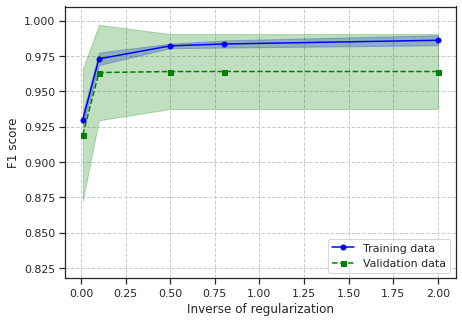

In [ ]:
#La grafica Anterior se obtiene a partir de:

### crea un objeto de la clase LogisticRegression
clf = LogisticRegression(solver='lbfgs', max_iter=1000)

### set the name (a str) of the hyperparameter you want to vary
param_name = 'C'

### set the parameter values for the hyperparameters
param_range = (0.01, 0.1, 0.5, 0.8, 2)

#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

train_scores, val_scores = validation_curve(
    clf,
    X_train,
    y_train,
    param_name=param_name,
    param_range=param_range,
    cv=10,
    scoring='f1',
    n_jobs=1
)

# compute the mean of train and val scores across different values
# for the hyperparameter
mean_train_scores = np.mean(train_scores, axis=1)
mean_val_scores = np.mean(val_scores, axis=1)

# compute the standard deviation of train and val scores across
# different values for the hyperparameter
std_train_scores = np.std(train_scores, axis=1)
std_val_scores = np.std(val_scores, axis=1)


fig = plt.figure(figsize=(7,5))
ax = fig.add_subplot(111)

ax.plot(
    param_range, mean_train_scores, color='blue',
    marker='o', linestyle='-', markersize=5,
    label='Training data'
)

ax.fill_between(
    param_range, mean_train_scores + std_train_scores,
    mean_train_scores - std_train_scores, alpha=0.25,
    color='blue'
)

ax.plot(
    param_range, mean_val_scores, color='green',
    marker='s', linestyle='--', markersize=5,
    label='Validation data'
)

ax.fill_between(
    param_range, mean_val_scores + std_val_scores,
    mean_val_scores - std_val_scores, alpha=0.25,
    color='green'
)

ax.set_xlabel('Inverse of regularization')
ax.set_ylabel('F1 score')

min_train_scores = np.min(train_scores)
min_val_scores = np.min(val_scores)

ax.set_ylim(min(min_train_scores, min_val_scores) - 0.01, 1.01)
ax.grid(linestyle='--')
ax.legend(loc='lower right')

**Se observa que el mejor de los umbrales tiene un performance de más o menos de 0.97 de f1 score.** los modelos que entrenemos de aquí adelante al menos para alguna de la combinación de hiperparámetros deben ser mejores.

### 3.1.3. Matriz de confusion y curva ROC para Regresion Lineal

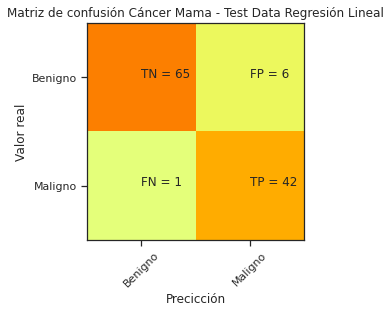

In [ ]:
cm = confusion_matrix(y_test, preds_RL)

plt.clf()
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Wistia)
classNames = ['Benigno','Maligno']#generalizar
plt.title('Matriz de confusión Cáncer Mama - Test Data Regresión Lineal')#generalizar
plt.ylabel('Valor real')
plt.xlabel('Precicción')
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames, rotation=45)
plt.yticks(tick_marks, classNames)
s = [['TN','FP'], ['FN', 'TP']]
for i in range(2):
    for j in range(2):
        plt.text(j,i, str(s[i][j])+" = "+str(cm[i][j]))
plt.show()

## **3.2 Entrenamiento con ARBOL DE DECISIONES**

Los arboles de decisión tienen como objetivo crear un modelo que prediga el valor de una variable mediante el aprendizaje de reglas de decisi´on simples inferidas de las caracter´ısticas
de los datos

In [ ]:
#model_Tree = DecisionTreeClassifier(criterion='entropy', min_samples_split=2, max_features='auto', class_weight="balanced")
model_Tree = DecisionTreeClassifier(max_features='auto', class_weight="balanced")
model_Tree.fit(X_train, y_train.ravel())

kf = KFold(n_splits=5, shuffle=True, random_state=123)

scores = cross_val_score(model_Tree, X_train, y_train.ravel(), cv=kf, scoring="accuracy")

print("Metricas cross_validation Arbol de decisiones", scores)

print("Media de cross_validation Arbol de decisiones", scores.mean())

preds_TREE = model_Tree.predict(X_test)

score_pred = metrics.accuracy_score(y_test.ravel(), preds_TREE)

print("Metrica en Test Arbol de decisiones", score_pred)

DiccionarioError["DecTree"]=scores.mean()

Metricas cross_validation Arbol de decisiones [0.92307692 0.89010989 0.91208791 0.91208791 0.94505495]
Media de cross_validation Arbol de decisiones 0.9164835164835164
Metrica en Test Arbol de decisiones 0.9210526315789473


In [37]:
?DecisionTreeClassifier

Se observa que se tiene una  **precisión del 0.92**  para el aprendizaje del modelo de Árbol de Decisiones

### **3.2.1.Ejemplo de uso TREE: Realizamos el diagnostico para el paciente 1 y paciente 2 con el modelo entrenado:**

In [ ]:
# paciente 1 id= 8510824 diagnosis= B

paciente_1 = df.iloc[21, 0:30].values
# Visualizar las variables del paciente 1
print("datos paciente 1 : \n", paciente_1)
#De antemano conocemos que el paciente tiene un diagnostico Benigno.
#Para efectos de las pruebas se toman los valores de la columna 0 a la columna 30.
# No se toma la última columna 31 debido a que en ella se encuentra el diagnostico generado por defecto
# Y para demostrar que el algoritmo estima correctamente el valor Benigno no se va tener en cuenta.


datos paciente 1 : 
 [9.504e+00 1.244e+01 6.034e+01 2.739e+02 1.024e-01 6.492e-02 2.956e-02
 2.076e-02 1.815e-01 6.905e-02 2.773e-01 9.768e-01 1.909e+00 1.570e+01
 9.606e-03 1.432e-02 1.985e-02 1.421e-02 2.027e-02 2.968e-03 1.023e+01
 1.566e+01 6.513e+01 3.149e+02 1.324e-01 1.148e-01 8.867e-02 6.227e-02
 2.450e-01 7.773e-02]


In [ ]:
# paciente 1 id= 8510824 diagnosis= B
pred_1 = model_Tree.predict([paciente_1])
pred_proba_1 = model_Tree.predict_proba([paciente_1])
print("Diagnosis: ", pred_1)
print("Probabilidad Benigno: ", pred_proba_1[0][0])
print("Probabilidad Maligno: ", pred_proba_1[0][1])

Diagnosis:  [0]
Probabilidad Benigno:  1.0
Probabilidad Maligno:  0.0


Una vez el modelo fue entrenado, se realiza el diagnostico con los datos del paciente 1
el cual arroja un resultado benigno con una probabilidad del 1.0 y una probabilidad del
0.0 de malignidad. **Lo demuestra que el modelo es muy preciso a diferencia del de regresión lineal**

In [ ]:
# paciente 2 id= 84358402 diagnosis= M (1)
paciente_2 = df.iloc[4,0:30].values
# Visualizar las variables del paciente 2
print ("datos paciente 2 : \n", paciente_2)
#De antemano conocemos que el paciente tiene un diagnostico Maligno.
#Para efectos de las pruebas se toman los valores de la columna 0 a la columna 30.
# No se toma la última columna 31 debido a que en ella se encuentra el diagnostico generado por defecto
# Y para demostrar que el algoritmo estima correctamente el valor maligno no se va tener en cuenta.

datos paciente 2 : 
 [2.029e+01 1.434e+01 1.351e+02 1.297e+03 1.003e-01 1.328e-01 1.980e-01
 1.043e-01 1.809e-01 5.883e-02 7.572e-01 7.813e-01 5.438e+00 9.444e+01
 1.149e-02 2.461e-02 5.688e-02 1.885e-02 1.756e-02 5.115e-03 2.254e+01
 1.667e+01 1.522e+02 1.575e+03 1.374e-01 2.050e-01 4.000e-01 1.625e-01
 2.364e-01 7.678e-02]


In [ ]:
# paciente 2 id= 84358402 diagnosis= M Maligno es 1
pred_2 = model_Tree.predict([paciente_2])
pred_proba_2 = model_Tree.predict_proba([paciente_2])
print("Diagnosis: ", pred_2)
print("Probabilidad Benigno: ", pred_proba_2[0][0])
print("Probabilidad Maligno: ", pred_proba_2[0][1])

Diagnosis:  [1]
Probabilidad Benigno:  0.0
Probabilidad Maligno:  1.0


Una vez el modelo fue entrenado, se realiza el diagnostico con los datos del paciente 2, el cual arroja un resultado **maligno** con una probabilidaid de 1.0 y una probabilidad de **begnino** de 0.0. Lo que valida una vez más la precision del modelo.

***`Podemos decir como conclusión que los árboles de desición tienen dos ventajas respecto a los demás algoritmos. El modelo resultante puede ser comprendido y visualizado fácilmente y los algoritmos son independientes de la escala de los datos.`***




### **3.2.2. Evaluamos efectividad del modelo arboles de decisiones**

Ahora sabiendo que uno de los hiperparámetros que podemos controlar es la profundidad del árbol. Este hiperparámetro es el que variaremos y con el que evaluaremos la efectividad en diferentes conjuntos de validación/entrenamiento usando k-fold cross validation como hicimos con la regresión logística.

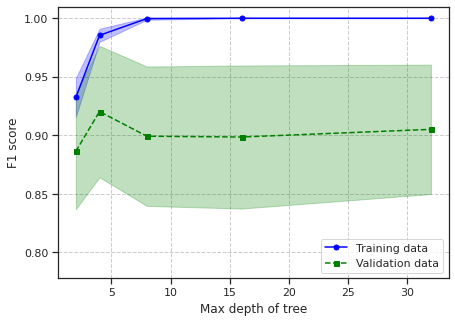

In [ ]:
# crea un objeto de la clase DecisionTreeClassifier
clf = DecisionTreeClassifier()

# set the name (a str) of the hyperparameter you want to vary
param_name = 'max_depth'

# set the parameter values for the hyperparameters
param_range = (2, 4, 8, 16, 32)


train_scores, val_scores = validation_curve(
    clf,
    X_train,
    y_train,
    param_name=param_name,
    param_range=param_range,
    cv=10,
    scoring='f1',
    n_jobs=1
)

# compute the mean of train and val scores across different values
# for the hyperparameter
mean_train_scores = np.mean(train_scores, axis=1)
mean_val_scores = np.mean(val_scores, axis=1)

# compute the standard deviation of train and val scores across
# different values for the hyperparameter
std_train_scores = np.std(train_scores, axis=1)
std_val_scores = np.std(val_scores, axis=1)


fig = plt.figure(figsize=(7,5))
ax = fig.add_subplot(111)

ax.plot(
    param_range, mean_train_scores, color='blue',
    marker='o', linestyle='-', markersize=5,
    label='Training data'
)

ax.fill_between(
    param_range, mean_train_scores + std_train_scores,
    mean_train_scores - std_train_scores, alpha=0.25,
    color='blue'
)

ax.plot(
    param_range, mean_val_scores, color='green',
    marker='s', linestyle='--', markersize=5,
    label='Validation data'
)

ax.fill_between(
    param_range, mean_val_scores + std_val_scores,
    mean_val_scores - std_val_scores, alpha=0.25,
    color='green'
)

ax.set_xlabel('Max depth of tree')
ax.set_ylabel('F1 score')

min_train_scores = np.min(train_scores)
min_val_scores = np.min(val_scores)

ax.set_ylim(min(min_train_scores, min_val_scores) - 0.01, 1.01)
ax.grid(linestyle='--')
ax.legend(loc='lower right')

Se observa que el **mejor de los umbrales tiene un performance de más o menos de 0.99 y tiende a 1.0 de f1 score.** los que indica que es un modeleo muy preciso

### 3.2.3. Matriz de confusion y curva ROC para Arbol de decisiones

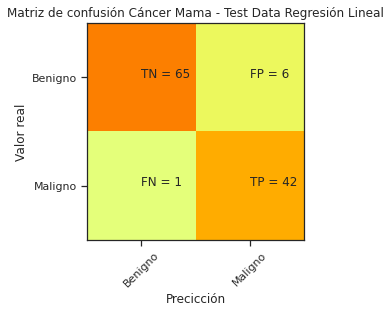

In [ ]:
cm = confusion_matrix(y_test, preds_RL)

plt.clf()
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Wistia)
classNames = ['Benigno','Maligno']
plt.title('Matriz de confusión Cáncer Mama - Test Data Regresión Lineal')
plt.ylabel('Valor real')
plt.xlabel('Precicción')
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames, rotation=45)
plt.yticks(tick_marks, classNames)
s = [['TN','FP'], ['FN', 'TP']]
for i in range(2):
    for j in range(2):
        plt.text(j,i, str(s[i][j])+" = "+str(cm[i][j]))
plt.show()

#Agregar Curva AUC ROC

## **3.3. Entrenamiento con KNN**

El clasificador basado en vecinos cercanos es un modelo supervisado cuya funcion es
encontrar un n´umero predefinido de muestras de entrenamiento en una distancia cercana
a un nuevo punto y predecir un valor a partir de ellas. La distancia puede ser, en general,
cualquier medida m´etrica, por lo general la distancia euclidiana est´andar es la opci´on
m´as com´un. Este m´etodo es conocido como no generalizado, ya que simplemente recuerda
todos sus datos de entrenamiento

In [ ]:
model_knn =  KNeighborsClassifier(n_neighbors = 5,
metric = 'minkowski', p = 2)
model_knn.fit(X_train, y_train.ravel())

kf = KFold(n_splits=5, shuffle=True, random_state=123)

scores = cross_val_score(model_knn, X_train, y_train.ravel(), cv=kf, scoring="accuracy")

print("Metricas cross_validation KNN", scores)

print("Media de cross_validation KNN", scores.mean())

preds_knn = model_knn.predict(X_test)

score_pred = metrics.accuracy_score(y_test.ravel(), preds_knn)

print("Metrica en Test KNN", score_pred)
DiccionarioError["KNN"]=scores.mean()

Metricas cross_validation KNN [0.96703297 0.97802198 0.95604396 0.95604396 0.97802198]
Media de cross_validation KNN 0.9670329670329669
Metrica en Test KNN 0.9473684210526315


### **3.3.1.Ejemplo de uso KNN: Realizamos el diagnostico para el paciente 1 y paciente 2 con el modelo entrenado:**

In [ ]:
# paciente 1 id= 8510824 diagnosis= B

paciente_1 = df.iloc[21, 0:30].values
# Visualizar las variables del paciente 1
print("datos paciente 1 : \n", paciente_1)
#De antemano conocemos que el paciente tiene un diagnostico Benigno.
#Para efectos de las pruebas se toman los valores de la columna 0 a la columna 30.
# No se toma la última columna 31 debido a que en ella se encuentra el diagnostico generado por defecto
# Y para demostrar que el algoritmo estima correctamente el valor Benigno no se va tener en cuenta.

datos paciente 1 : 
 [9.504e+00 1.244e+01 6.034e+01 2.739e+02 1.024e-01 6.492e-02 2.956e-02
 2.076e-02 1.815e-01 6.905e-02 2.773e-01 9.768e-01 1.909e+00 1.570e+01
 9.606e-03 1.432e-02 1.985e-02 1.421e-02 2.027e-02 2.968e-03 1.023e+01
 1.566e+01 6.513e+01 3.149e+02 1.324e-01 1.148e-01 8.867e-02 6.227e-02
 2.450e-01 7.773e-02]


In [ ]:
# paciente 1 id= 8510824 diagnosis= B
pred_1 = model_knn.predict([paciente_1])
pred_proba_1 = model_knn.predict_proba([paciente_1])
print("Diagnosis: ", pred_1)
print("Probabilidad Benigno: ", pred_proba_1[0][0])
print("Probabilidad Maligno: ", pred_proba_1[0][1])

Diagnosis:  [1]
Probabilidad Benigno:  0.0
Probabilidad Maligno:  1.0


Una vez el modelo fue entrenado, se realiza el diagnostico con los datos del paciente 1
el cual arroja un resultado maligno con una probabilidad del 1.0 y una probabilidad del
0.0 de begnino. Este modelo no es muy preciso a la hora de detectar begninos.

In [ ]:
# paciente 2 id= 84358402 diagnosis= M (1)
paciente_2 = df.iloc[4,0:30].values
# Visualizar las variables del paciente 2
print ("datos paciente 2 : \n", paciente_2)
#De antemano conocemos que el paciente tiene un diagnostico Maligno.
#Para efectos de las pruebas se toman los valores de la columna 0 a la columna 30.
# No se toma la última columna 31 debido a que en ella se encuentra el diagnostico generado por defecto
# Y para demostrar que el algoritmo estima correctamente el valor maligno no se va tener en cuenta.

datos paciente 2 : 
 [2.029e+01 1.434e+01 1.351e+02 1.297e+03 1.003e-01 1.328e-01 1.980e-01
 1.043e-01 1.809e-01 5.883e-02 7.572e-01 7.813e-01 5.438e+00 9.444e+01
 1.149e-02 2.461e-02 5.688e-02 1.885e-02 1.756e-02 5.115e-03 2.254e+01
 1.667e+01 1.522e+02 1.575e+03 1.374e-01 2.050e-01 4.000e-01 1.625e-01
 2.364e-01 7.678e-02]


In [ ]:
# paciente 2 id= 84358402 diagnosis= M Maligno es 1
pred_2 = model_knn.predict([paciente_2])
pred_proba_2 = model_knn.predict_proba([paciente_2])
print("Diagnosis: ", pred_2)
print("Probabilidad Benigno: ", pred_proba_2[0][0])
print("Probabilidad Maligno: ", pred_proba_2[0][1])

Diagnosis:  [1]
Probabilidad Benigno:  0.0
Probabilidad Maligno:  1.0


Una vez el modelo fue entrenado, se realiza el diagnostico con los datos del paciente 2
el cual arroja un resultado maligno con una probabilidad del 1.0 y una probabilidad del
0.0 de benignidad.Excelente precisión.

### 3.3.2. Evaluamos efectividad del modelo KNN

Ahora pasaremos con el modelo de los k vecinos más cercanos. Uno de los hiperparámetros que podemos controlar es la cantidad de vecinos que comparamos para tomar una decisión de que clase queremos asignar, esto se puede hacer por mayoría. En este caso vamos a variar este hiperparámetro y a evaluar el desempeño con validación cruzada.

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when

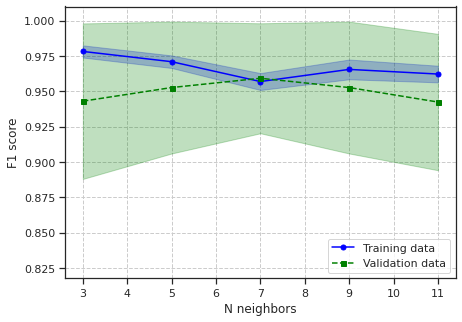

In [ ]:
# crea un objeto de la clase DecisionTreeClassifier
clf = KNeighborsClassifier()

# set the name (a str) of the hyperparameter you want to vary
param_name = 'n_neighbors'

# set the parameter values for the hyperparameters
param_range = (3,5,7,9,11)

train_scores, val_scores = validation_curve(
    clf,
    X_train,
    y_train,
    param_name=param_name,
    param_range=param_range,
    cv=10,
    scoring='f1',
    n_jobs=1
)

# compute the mean of train and val scores across different values
# for the hyperparameter
mean_train_scores = np.mean(train_scores, axis=1)
mean_val_scores = np.mean(val_scores, axis=1)

# compute the standard deviation of train and val scores across
# different values for the hyperparameter
std_train_scores = np.std(train_scores, axis=1)
std_val_scores = np.std(val_scores, axis=1)


fig = plt.figure(figsize=(7,5))
ax = fig.add_subplot(111)

ax.plot(
    param_range, mean_train_scores, color='blue',
    marker='o', linestyle='-', markersize=5,
    label='Training data'
)

ax.fill_between(
    param_range, mean_train_scores + std_train_scores,
    mean_train_scores - std_train_scores, alpha=0.25,
    color='blue'
)

ax.plot(
    param_range, mean_val_scores, color='green',
    marker='s', linestyle='--', markersize=5,
    label='Validation data'
)

ax.fill_between(
    param_range, mean_val_scores + std_val_scores,
    mean_val_scores - std_val_scores, alpha=0.25,
    color='green'
)

ax.set_xlabel('N neighbors')
ax.set_ylabel('F1 score')

min_train_scores = np.min(train_scores)
min_val_scores = np.min(val_scores)

ax.set_ylim(min(min_train_scores, min_val_scores) - 0.01, 1.01)
ax.grid(linestyle='--')
ax.legend(loc='lower right')

### **3.3.3. Matriz de confusion y curva ROC para KNN**

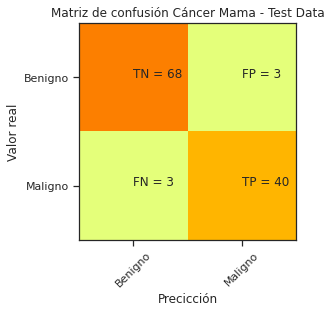

In [ ]:
cm = confusion_matrix(y_test, preds_knn)

plt.clf()
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Wistia)
classNames = ['Benigno','Maligno']
plt.title('Matriz de confusión Cáncer Mama - Test Data')
plt.ylabel('Valor real')
plt.xlabel('Precicción')
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames, rotation=45)
plt.yticks(tick_marks, classNames)
s = [['TN','FP'], ['FN', 'TP']]
for i in range(2):
    for j in range(2):
        plt.text(j,i, str(s[i][j])+" = "+str(cm[i][j]))
plt.show()

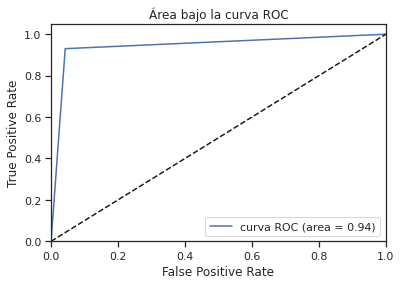

In [ ]:
fpr, tpr, thresholds = metrics.roc_curve(y_test, preds_knn)
roc_auc = metrics.auc(fpr, tpr)


plt.figure()
plt.plot(fpr, tpr, label='curva ROC (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Área bajo la curva ROC')
plt.legend(loc="lower right")
plt.show()

## **3.4. Entrenamiento con SVM (Maquina de vectores)**

Las maquinas de vectores de soporte (SVM) son un conjunto de métodos de aprendizaje
supervisado utilizados para la clasificacion , regresion y deteccion de valores atípicos. Esta técnica utiliza un subconjunto de puntos de entrenamiento en la funci´on de decisi´on (llamados vectores de soporte), por lo que es eficiente en memoria.

In [ ]:
model_SVM = SVC(kernel = 'linear', random_state = 0, probability=True)
model_SVM.fit(X_train, y_train.ravel())

kf = KFold(n_splits=5, shuffle=True, random_state=123)

scores = cross_val_score(model_SVM, X_train, y_train.ravel(), cv=kf, scoring="accuracy")

print("Metricas cross_validation SVM", scores)

print("Media de cross_validation SVM", scores.mean())

preds = model_SVM.predict(X_test)

score_pred = metrics.accuracy_score(y_test.ravel(), preds)

print("Metrica en Test SVM", score_pred)
DiccionarioError["SVM"]=scores.mean()

Metricas cross_validation SVM [0.94505495 0.95604396 0.98901099 0.96703297 0.97802198]
Media de cross_validation SVM 0.9670329670329669
Metrica en Test SVM 0.956140350877193


Una vez el modelo fue entrenado se obtuvo un
valor de 0.96 de precision del aprendizaje del mismo.

### 3.4.1. Ejemplo de uso SVM: Realizamos el diagnostico para el paciente 1 y paciente 2 con el modelo entrenado:

In [ ]:
# paciente 1 id= 8510824 diagnosis= B

paciente_1 = df.iloc[21, 0:30].values
# Visualizar las variables del paciente 1
print("datos paciente 1 : \n", paciente_1)
#De antemano conocemos que el paciente tiene un diagnostico Benigno.
#Para efectos de las pruebas se toman los valores de la columna 0 a la columna 30.
# No se toma la última columna 31 debido a que en ella se encuentra el diagnostico generado por defecto
# Y para demostrar que el algoritmo estima correctamente el valor Benigno no se va tener en cuenta

datos paciente 1 : 
 [9.504e+00 1.244e+01 6.034e+01 2.739e+02 1.024e-01 6.492e-02 2.956e-02
 2.076e-02 1.815e-01 6.905e-02 2.773e-01 9.768e-01 1.909e+00 1.570e+01
 9.606e-03 1.432e-02 1.985e-02 1.421e-02 2.027e-02 2.968e-03 1.023e+01
 1.566e+01 6.513e+01 3.149e+02 1.324e-01 1.148e-01 8.867e-02 6.227e-02
 2.450e-01 7.773e-02]


In [ ]:
pred_1 = model_SVM.predict([paciente_1])
pred_proba_1 = model_SVM.predict_proba([paciente_1])
print("Diagnosis: ", pred_1)
print("Probabilidad Benigno: ", pred_proba_1[0][0])
print("Probabilidad Maligno: ", pred_proba_1[0][1])


Diagnosis:  [1]
Probabilidad Benigno:  3.00000089999998e-14
Probabilidad Maligno:  0.9999999999999699


In [ ]:
# paciente 2 id= 84358402 diagnosis= M Maligno es 1
pred_2 = model_SVM.predict([paciente_2])
pred_proba_2 = model_SVM.predict_proba([paciente_2])
print("Diagnosis: ", pred_2)
print("Probabilidad Benigno: ", pred_proba_2[0][0])
print("Probabilidad Maligno: ", pred_proba_2[0][1])


Diagnosis:  [1]
Probabilidad Benigno:  3.00000089999998e-14
Probabilidad Maligno:  0.9999999999999699


### **3.4.2.Evaluamos efectividad del modeleo SVM**

Ahora pasaremos con el modelo de máquinas de vectores de soporte. Uno de los hiperparámetros que podemos controlar es el tipo de funcion kernel. En este caso vamos a variar este hiperparámetro y a evaluar el desempeño con validación cruzada:

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_o

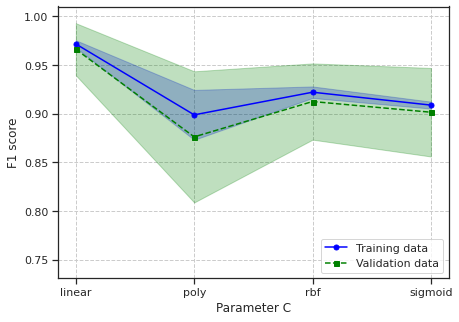

In [ ]:
# crea un objeto de la clase DecisionTreeClassifier
clf = SVC(max_iter=100, gamma='auto')
from sklearn.preprocessing import MinMaxScaler


scaler = MinMaxScaler(copy=True)
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)

# set the name (a str) of the hyperparameter you want to vary
param_name = 'kernel'

# set the parameter values for the hyperparameters
param_range = ('linear', 'poly', 'rbf', 'sigmoid')

train_scores, val_scores = validation_curve(
    clf,
    X_train_scaled,
    y_train,
    param_name=param_name,
    param_range=param_range,
    cv=10,
    scoring='f1',
    n_jobs=1
)

# compute the mean of train and val scores across different values
# for the hyperparameter
mean_train_scores = np.mean(train_scores, axis=1)
mean_val_scores = np.mean(val_scores, axis=1)

# compute the standard deviation of train and val scores across
# different values for the hyperparameter
std_train_scores = np.std(train_scores, axis=1)
std_val_scores = np.std(val_scores, axis=1)


fig = plt.figure(figsize=(7,5))
ax = fig.add_subplot(111)

ax.plot(
    param_range, mean_train_scores, color='blue',
    marker='o', linestyle='-', markersize=5,
    label='Training data'
)

ax.fill_between(
    param_range, mean_train_scores + std_train_scores,
    mean_train_scores - std_train_scores, alpha=0.25,
    color='blue'
)

ax.plot(
    param_range, mean_val_scores, color='green',
    marker='s', linestyle='--', markersize=5,
    label='Validation data'
)

ax.fill_between(
    param_range, mean_val_scores + std_val_scores,
    mean_val_scores - std_val_scores, alpha=0.25,
    color='green'
)

ax.set_xlabel('Parameter C')
ax.set_ylabel('F1 score')

min_train_scores = np.min(train_scores)
min_val_scores = np.min(val_scores)

ax.set_ylim(min(min_train_scores, min_val_scores) - 0.01, 1.01)
ax.grid(linestyle='--')
ax.legend(loc='lower right')

## **3.5 Entrenamiento con RANDOM FOREST**

Un clasificador de bosque aleatorio es un meta estimador que se ajusta a varios clasificadores de ´arbol de decisi´on en varias submuestras de un conjunto de datos que utiliza
el promedio para mejorar la precisi´on predictiva y controlar el sobreajuste

In [ ]:
model_rf = ExtraTreesClassifier(n_estimators=100, criterion='entropy')
model_rf.fit(X_train, y_train.ravel())

kf = KFold(n_splits=5, shuffle=True, random_state=123)

scores = cross_val_score(model_rf, X_train, y_train.ravel(), cv=kf, scoring="accuracy")

print("Metricas cross_validation RF", scores)

print("Media de cross_validation RF", scores.mean())

preds_rf = model_rf.predict(X_test)

score_pred = metrics.accuracy_score(y_test.ravel(), preds_rf)

print("Metrica en Test RF", score_pred)
DiccionarioError["RandomForest"]=scores.mean()

Metricas cross_validation RF [0.96703297 0.97802198 0.95604396 0.94505495 0.98901099]
Media de cross_validation RF 0.9670329670329669
Metrica en Test RF 0.9736842105263158


### 3.5.1. Ejemplo de uso RF: Realizamos el diagnostico para el paciente 1 y paciente 2 con el modelo entrenado:

In [ ]:
pred_1 = model_rf.predict([paciente_1])
pred_proba_1 = model_rf.predict_proba([paciente_1])
print("Diagnosis: ", pred_1)
print("Probabilidad Benigno: ", pred_proba_1[0][0])
print("Probabilidad Maligno: ", pred_proba_1[0][1])

Diagnosis:  [1]
Probabilidad Benigno:  0.05
Probabilidad Maligno:  0.95


In [ ]:
pred_2 = model_rf.predict([paciente_2])
pred_proba_2 = model_rf.predict_proba([paciente_2])
print("Diagnosis: ", pred_2)
print("Probabilidad Benigno: ", pred_proba_2[0][0])
print("Probabilidad Maligno: ", pred_proba_2[0][1])

Diagnosis:  [1]
Probabilidad Benigno:  0.01
Probabilidad Maligno:  0.99


### 3.5.2. Matriz de confusion y curva ROC para random forest

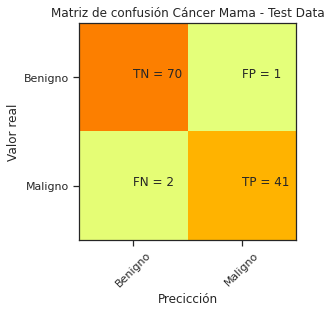

In [ ]:
cm = confusion_matrix(y_test, preds_rf)

plt.clf()
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Wistia)
classNames = ['Benigno','Maligno']
plt.title('Matriz de confusión Cáncer Mama - Test Data')
plt.ylabel('Valor real')
plt.xlabel('Precicción')
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames, rotation=45)
plt.yticks(tick_marks, classNames)
s = [['TN','FP'], ['FN', 'TP']]
for i in range(2):
    for j in range(2):
        plt.text(j,i, str(s[i][j])+" = "+str(cm[i][j]))
plt.show()

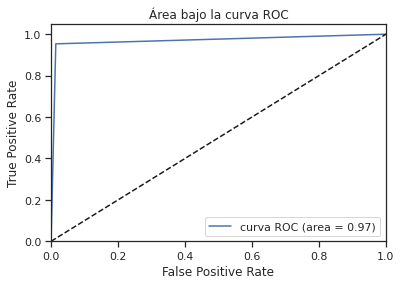

In [ ]:
fpr, tpr, thresholds = metrics.roc_curve(y_test, preds_rf)
roc_auc = metrics.auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, label='curva ROC (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Área bajo la curva ROC')
plt.legend(loc="lower right")
plt.show()

## 4.Modelo automatico identificacion de parametros y mejor modelo para el data set**

Se ensayan con una variedad de métodos que se sospecha que podrían dar buenos resultados.
Regresión Logistica,
Árbol de desiciones,
entrenamiento KNN,
 maquina de soporte de vectores,
 Randomforest.


In [ ]:
# Test options and evaluation metric
num_folds = 10
seed = 7

#scoring = 'neg_mean_squared_error'
scoring = 'r2'

# Spot-Check Algorithms
models = []
models.append(('RL', LogisticRegression()))
models.append(('TREE', DecisionTreeClassifier()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('SVM', SVC()))
models.append(('RF', ExtraTreesClassifier()))


In [ ]:
# evaluate each model in turn
results = []
names = []
for name, model in models:
    kfold = KFold(n_splits=num_folds, random_state=seed)
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s R^2: %.3f (%.3f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ),

RL R^2: 0.866 (0.093)
TREE R^2: 0.631 (0.205)
KNN R^2: 0.845 (0.109)


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d arr

SVM R^2: 0.883 (0.057)


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 

RF R^2: 0.811 (0.103)


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


In [ ]:
# Standardize the dataset


models.append(('RL', LogisticRegression()))
models.append(('TREE', DecisionTreeClassifier()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('SVM', SVC()))
models.append(('RF', ExtraTreesClassifier()))
pipelines = []
pipelines.append(('ScaledRL', Pipeline([('Scaler', StandardScaler()),('RL', LogisticRegression())])))
pipelines.append(('ScaledTREE', Pipeline([('Scaler', StandardScaler()),('TREE', DecisionTreeClassifier())])))
pipelines.append(('ScaledKNN', Pipeline([('Scaler', StandardScaler()),('KNN', KNeighborsClassifier())])))
pipelines.append(('ScaledSVM', Pipeline([('Scaler', StandardScaler()),('SVM', SVC())])))
pipelines.append(('ScaledRF', Pipeline([('Scaler', StandardScaler()),('RF', ExtraTreesClassifier())])))


In [ ]:
results = []
names = ['RL','TREE','KNN','SVM','RF']
for name, model in pipelines:
    kfold = KFold(n_splits=num_folds, random_state=seed)
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s R^2: %.3f (%.3f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ),

ScaledRL R^2: 0.866 (0.093)
ScaledTREE R^2: 0.651 (0.190)
ScaledKNN R^2: 0.845 (0.109)


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/sklearn/pipeline.py:354: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/pipeline.py:354: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/pipeline.py:354: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_sam

ScaledSVM R^2: 0.883 (0.057)


/usr/local/lib/python3.7/dist-packages/sklearn/pipeline.py:354: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/pipeline.py:354: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/pipeline.py:354: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/pipeline.py:354: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for 

ScaledRF R^2: 0.843 (0.077)


/usr/local/lib/python3.7/dist-packages/sklearn/pipeline.py:354: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params)


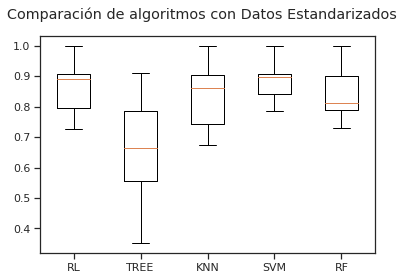

In [ ]:
# Compare Algorithms
fig = pyplot.figure()
fig.suptitle('Comparación de algoritmos con Datos Estandarizados')
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names)
pyplot.show()